## Version Information

<table align="left">
  <thead>
    <tr>
      <th>Component</th>
      <th>Version</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>python</td>
      <td>3.11.5</td>
    </tr>
    <tr>
      <td>cirq</td>
      <td>1.3.0</td>
    </tr>
  </tbody>
</table>

</table>


In [1]:
import cirq

In [47]:
def find_all_as(N):
    ns = []
    for n in range(2, N):
        if math.gcd(n, N) == 1:
            ns.append(n)
    return ns

          ┌──┐                        ┌────────┐   ┌──────────────┐   ┌─────────────────┐   ┌──────────────────────┐   ┌─────────────────┐   ┌──────────────┐   ┌────────┐
0: ───H────@─────@───────H───@──────────@─────────────────@────────────────────@───────────────────────────@──────────────────────────────────────────────────────────────────────────────×───M('result')───
           │     │           │          │                 │                    │                           │                                                                              │   │
1: ───H────┼@────┼───@───────@^-0.5────H┼───────────@─────┼─────────────@──────┼───────────────────@───────┼────────────────────@─────────────────────────────────────────────────────×───┼───M─────────────
           ││    │   │                  │           │     │             │      │                   │       │                    │                                                     │   │   │
2: ───H────┼┼────┼───┼─────────────

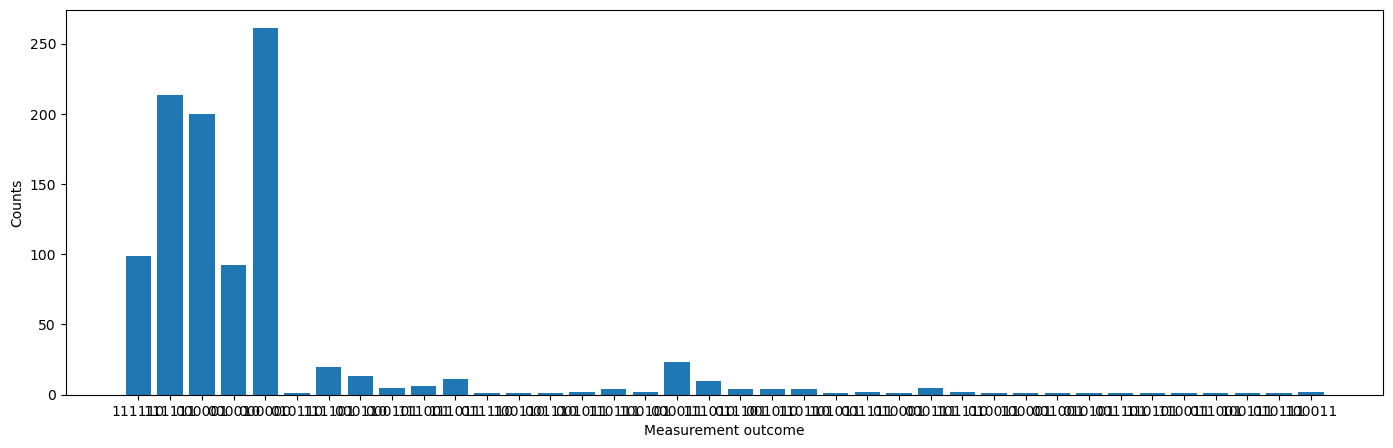

In [57]:
import cirq
import numpy as np
import math
import matplotlib.pyplot as plt

N = 5
a = 2
n_len = math.ceil(math.log2(N))
m_len = 2 * n_len

qubits = [cirq.LineQubit(i) for i in range(m_len + n_len)]
circuit = cirq.Circuit()

# Apply Hadamard gates to the first m_len qubits
for q in range(m_len):
    circuit.append(cirq.H(qubits[q]))

# Apply X gate to the m_len qubit
circuit.append(cirq.X(qubits[m_len]))

# Find all 'a's that are coprime to N
ns = find_all_as(N)

if a not in ns:
    raise ValueError(f"'a' must be one of {ns}")

# Apply controlled-U gates
for q in range(m_len):
    power = 2**q
    result = pow(a, power, N)
    for i, bit in enumerate(format(result ^ 1, f'0{n_len}b')):
        if bit == '1':
            circuit.append(cirq.CNOT(qubits[q], qubits[i + m_len]))

# Apply inverse QFT
def qft_inv(qubits):
    n = len(qubits)
    circuit = cirq.Circuit()
    for j in range(n):
        for k in range(j):
            circuit.append(cirq.CZ(qubits[j], qubits[k])**-0.5**(j - k))
        circuit.append(cirq.H(qubits[j]))
    for i in range(n//2):
        circuit.append(cirq.SWAP(qubits[i], qubits[n-i-1]))
    return circuit

circuit.append(qft_inv(qubits[:m_len]))

# Measure the first m_len qubits
circuit.append(cirq.measure(*qubits[:m_len], key='result'))

print(circuit)

# Simulate the circuit
simulator = cirq.Simulator()
result = simulator.run(circuit, repetitions=1000)

# Get the measurement results
counts = result.histogram(key='result')

# Convert the counts to a format suitable for plotting
counts_formatted = {format(key, f'0{m_len}b'): val for key, val in counts.items()}

# Plot the histogram
plt.figure(figsize=(17, 5))
plt.bar(counts_formatted.keys(), counts_formatted.values())
plt.xlabel('Measurement outcome')
plt.ylabel('Counts')
plt.show()
